In [1]:
import matplotlib.pyplot as plt
import numpy as np
import spatial_profiles as prf
import models
import boundary_conditions
import plotting

%matplotlib widget

In [2]:
ion_concentration_molar = 1e-1
ion_diameter_m = 8e-10
solvent_diameter_m = 2.75e-10
x = prf.get_x_axis_nm(xmax_nm=100, n_points=1000)
bc = boundary_conditions.Dirichlet(phi_0=-0.5)
xmin = -0.05
xmax = 10

## Gouy-Chapman
Gives insight, but ion concentrations are much too high.

Solved in 4 iterations, number of nodes 18078. 
Maximum relative residual: 2.34e-05 
Maximum boundary residual: 2.78e-67
ODE problem solved and saved under ./solutions/Gouy-Chapman\sol_Gouy-Chapman_c0_0.1000M__xmax_100nm__bc_Dirichlet_-0.500V.pkl.


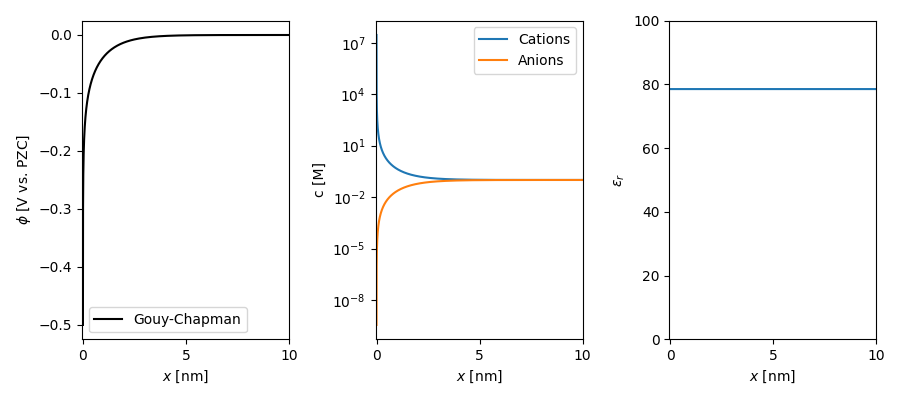

In [3]:
gc = models.GouyChapman(ion_concentration_molar)
gc_sol = gc.solve(x, bc)

fig, ax = plotting.plot_solution(gc_sol, xmin, xmax)
plt.show()

## Borukhov-Andelman-Orland
Ion concentration is limited to its maximum value at the electrode.

Solved in 1 iterations, number of nodes 1000. 
Maximum relative residual: 9.47e-06 
Maximum boundary residual: 1.05e-75
ODE problem solved and saved under ./solutions/Borukhov\sol_Borukhov_c0_0.1000M__xmax_100nm__bc_Dirichlet_-0.500V.pkl.


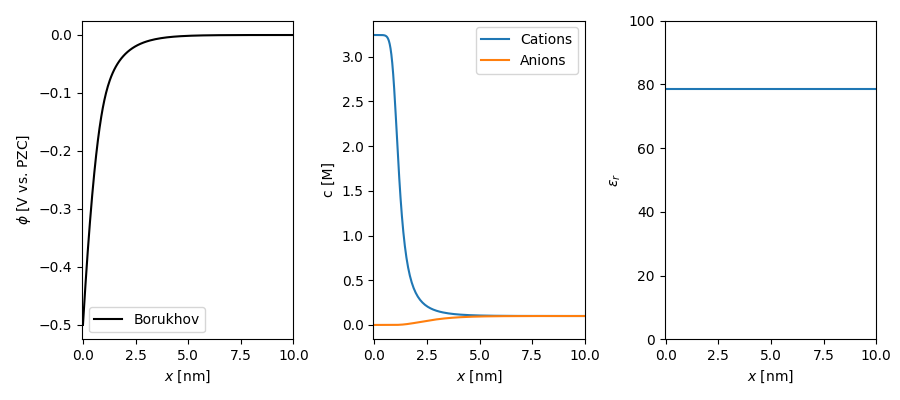

In [4]:
bao = models.Borukhov(ion_concentration_molar, ion_diameter_m)
bao_sol = bao.solve(x, bc)

fig, ax = plotting.plot_solution(bao_sol, xmin, xmax, logscale=False)
plt.show()

## Abrashkin-Andelman-Orland
A Stern layer emerges if the dipole energy is more negative (large dipole moment and large electric field) than the Coulomb energy of ions directly at the electrode.

Solved in 2 iterations, number of nodes 1053. 
Maximum relative residual: 1.95e-05 
Maximum boundary residual: 1.85e-101
ODE problem solved and saved under ./solutions/Abrashkin\sol_Abrashkin_c0_0.1000M__xmax_100nm__bc_Dirichlet_-0.500V.pkl.


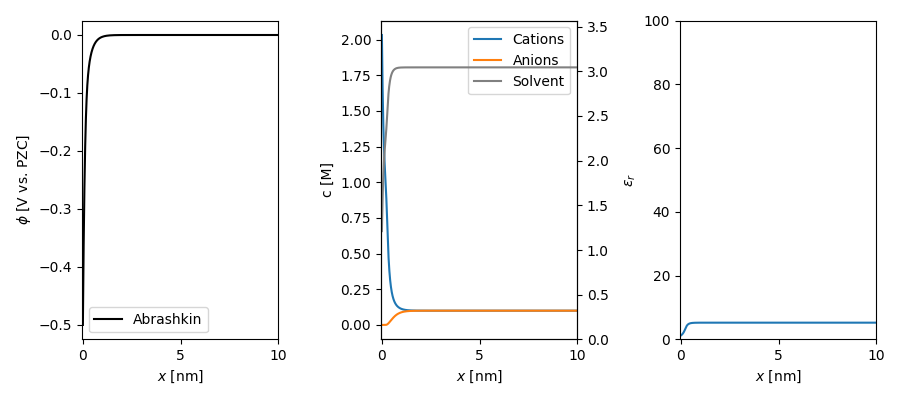

In [5]:
abr = models.Abrashkin(ion_concentration_molar, ion_diameter_m, eps_r_opt=1)
abr_sol = abr.solve(x, bc)

fig, ax = plotting.plot_solution(abr_sol, xmin, xmax, logscale=False)
plt.show()

## Huang-Chen-Eikerling

In [6]:
# huang = models.Huang(ion_concentration_molar, ion_diameter_m, ion_diameter_m, eps_r_opt=4)
# huang_sol = huang.solve(x, bc)
# fig, ax = plotting.plot_solution(huang_sol, xmin, xmax, logscale=False)
# plt.show()

Should equal Abrashkin for equal ion and solvent molecule sizes

In [7]:
# huang = models.Huang(ion_concentration_molar, ion_diameter_m, ion_diameter_m, eps_r_opt=1)
# huang_sol2 = huang.solve(x, bc)

# fig, ax = plotting.plot_sol_comparison(abr_sol, huang_sol2, xmin, xmax, logscale=False)

## Huang simplified

Solved in 2 iterations, number of nodes 2650. 
Maximum relative residual: 3.37e-05 
Maximum boundary residual: 2.62e-51
ODE problem solved and saved under ./solutions/Huang_eqnB\sol_Huang_eqnB_c0_0.1000M__xmax_100nm__bc_Dirichlet_-0.500V.pkl.


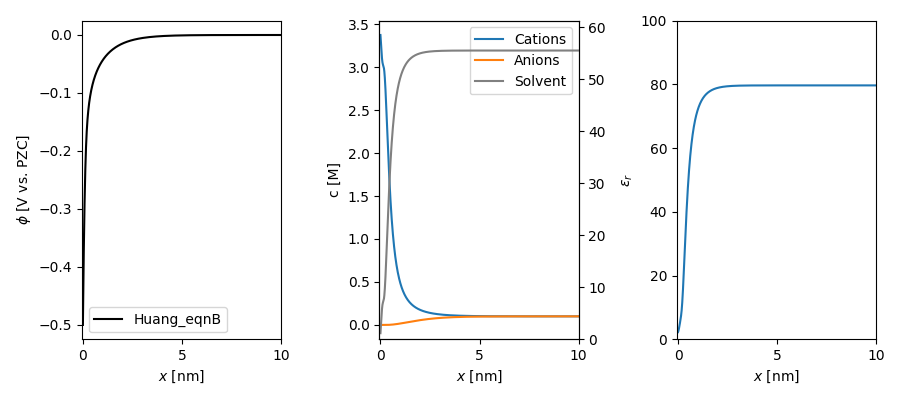

In [8]:
simple = models.Huang1(ion_concentration_molar, ion_diameter_m, ion_diameter_m, eps_r_opt=2)
simple_sol = simple.solve(x, bc)

fig, ax = plotting.plot_solution(simple_sol, xmin, xmax, logscale=False)
plt.show()

## Multispecies

In [9]:
# H = models.Species(1e-3, 15e-10, +1, r'H$^+$')
# ClO4 = models.Species(1e-3 + 25e-3, 10e-10, -1, r'ClO$_4^-$')
# Na = models.Species(25e-3, 8e-10, +1, r'Na$^+$')
# species_list = [H, ClO4, Na]
# water = models.Solvent(2.75e-10, r'H$_2$O')

# multi = models.Multispecies(species_list, water, eps_r_opt=1)
# multi_sol = multi.solve(x, bc)

# fig, ax = plotting.plot_solution(multi_sol, xmin, xmax, logscale=True)

Should equal Huang if there are two species

Solved in 2 iterations, number of nodes 2645. 
Maximum relative residual: 2.01e-04 
Maximum boundary residual: 2.32e-51
ODE problem solved and saved under ./solutions/Huang_eqnB\sol_Huang_eqnB_c0_0.1000M__xmax_100nm__bc_Dirichlet_-0.500V.pkl.


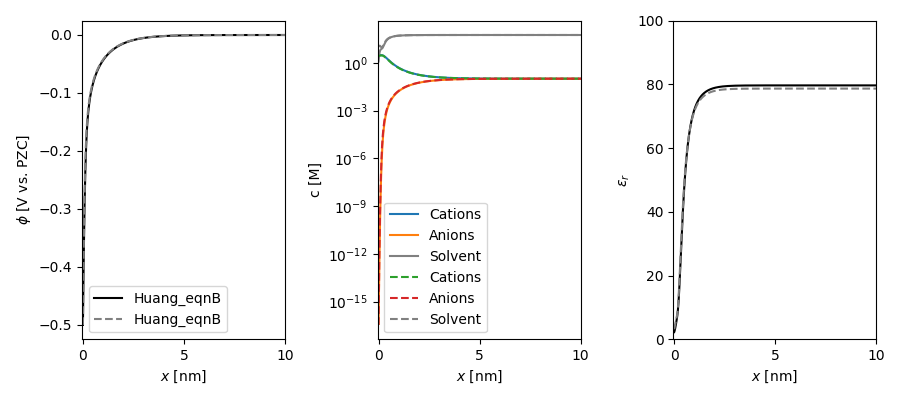

In [10]:
huang1 = models.Huang1(ion_concentration_molar, ion_diameter_m, ion_diameter_m, eps_r_opt=1)
huang1_sol = huang1.solve(x, bc)

fig, ax = plotting.plot_sol_comparison(simple_sol, huang1_sol, xmin, xmax, logscale=True)